## Data Exploration

The Company X is interested in offering promotion to it's multiple resellers so they increase the amount they buy. 

Company X's seller take a tablet to the site of sale, where they offer different amounts with promotions ranging from 15% to 30%.

To generate this promotions, the business unit needs an accurate forecast on how much is the next bill going to be for each particular reseller.

In [2]:
# Let's get the data

!wget https://ml-lab-mggaska.s3.amazonaws.com/sales-forecast/billing_sm.csv
!wget https://ml-lab-mggaska.s3.amazonaws.com/sales-forecast/reseller_sm.csv

--2019-07-02 13:38:52--  https://ml-lab-mggaska.s3.amazonaws.com/sales-forecast/billing_sm.csv
Resolving ml-lab-mggaska.s3.amazonaws.com (ml-lab-mggaska.s3.amazonaws.com)... 52.216.136.164
Connecting to ml-lab-mggaska.s3.amazonaws.com (ml-lab-mggaska.s3.amazonaws.com)|52.216.136.164|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 15803443 (15M) [binary/octet-stream]
Saving to: ‘billing_sm.csv’

billing_sm.csv      100%[===================>]  15.07M  --.-KB/s    in 0.1s    

2019-07-02 13:38:52 (157 MB/s) - ‘billing_sm.csv’ saved [15803443/15803443]

--2019-07-02 13:38:52--  https://ml-lab-mggaska.s3.amazonaws.com/sales-forecast/reseller_sm.csv
Resolving ml-lab-mggaska.s3.amazonaws.com (ml-lab-mggaska.s3.amazonaws.com)... 52.216.136.164
Connecting to ml-lab-mggaska.s3.amazonaws.com (ml-lab-mggaska.s3.amazonaws.com)|52.216.136.164|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 210111 (205K) [binary/octet-stream]
Saving to: ‘reseller_sm

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('billing_sm.csv')

In [5]:
df_r = pd.read_csv('reseller_sm.csv')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 467729 entries, 0 to 467728
Data columns (total 3 columns):
id_reseller    467729 non-null int64
date           467729 non-null object
bill           467729 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 10.7+ MB


In [7]:
df_r.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12358 entries, 0 to 12357
Data columns (total 3 columns):
id_reseller    12358 non-null int64
zone           12358 non-null int64
cluster        12358 non-null object
dtypes: int64(2), object(1)
memory usage: 289.7+ KB


In [8]:
df.head()

,id_reseller,date,bill
0,499921233,2019-01-02,466262.394
1,499921233,2019-01-04,99863.286
2,499921233,2019-01-21,234931.982
3,499921233,2019-01-23,127180.938
4,499921233,2019-01-28,335067.312


In [9]:
df_r.head()

,id_reseller,zone,cluster
0,499929090,1019,A
1,499929094,1019,A
2,499929097,1019,A
3,499929098,1019,A
4,499929163,1014,A


In [10]:
df['date'] = pd.to_datetime(df['date'])

In [11]:
print(df['date'].min(),df['date'].max())

2019-01-02 00:00:00 2019-05-21 00:00:00


So, we have 467729 purchases from 12358 different resellers ranging from 2019-01-02 to 2019-05-21. Let's see the average bill.

In [12]:
df['bill'].quantile([.1, .5, .9, 1])


0.1    2.424430e+03
0.5    6.744313e+03
0.9    2.892412e+04
1.0    1.952347e+07
Name: bill, dtype: float64

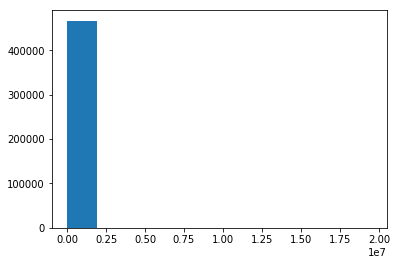

In [13]:
plt.hist(df['bill']);

Ignoring the outliers, we still hace a long tail distribution.

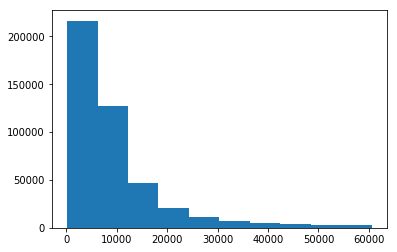

In [14]:
plt.hist(df[df["bill"] < df["bill"].quantile(0.95)]['bill']);

### Mean by day

Let's also analyse the mean by day to see if there's a trend or pattern in time

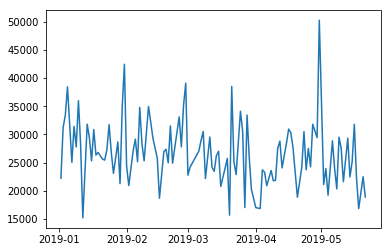

In [15]:
df_mean_by_day = df.groupby('date')['bill'].mean()
plt.plot(df_mean_by_day);